In [18]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Database connection using SSMS details
conn = pyodbc.connect(
    "DRIVER={SQL Server};"
    "SERVER=SHAUN;"  # Server name from SSMS
    "DATABASE=HotelData;"  # Database name
    "Trusted_Connection=yes;"  # Windows Authentication
)

In [20]:
# Query data
queries = {
    "Unique Customers": """
        SELECT COUNT(DISTINCT [Customer Number]) AS UniqueCustomers FROM Customers;
    """,
    
    "Occupancy Rate": """
        SELECT SUM([Number of Adults] + [Number of Children]) * 100.0 / 
               SUM([Maximum Occupancy]) AS OccupancyRate 
        FROM Reservations 
        JOIN Hotel_Rooms ON Reservations.[Room Number] = Hotel_Rooms.[Room Number];
    """,
    
    "Customer Complaints": """
        SELECT Reservations.[Room Number], COUNT(Tickets.[Ticket ID]) AS ComplaintCount 
        FROM Tickets 
        JOIN Reservations ON Tickets.[Reservation ID] = Reservations.[Reservation ID] 
        GROUP BY Reservations.[Room Number] 
        ORDER BY ComplaintCount DESC;
    """,
    
    "Key Complaints": """
        SELECT [Ticket Category], COUNT(*) AS ComplaintCount 
        FROM Tickets 
        GROUP BY [Ticket Category] 
        ORDER BY ComplaintCount DESC;
    """,
    
    "Customer Retention Rate": """
        WITH ReturningCustomers AS (
            SELECT [Customer Number], COUNT([Reservation ID]) AS VisitCount 
            FROM Reservations 
            GROUP BY [Customer Number] 
            HAVING COUNT([Reservation ID]) > 1
        ) 
        SELECT COUNT(*) * 100.0 / (SELECT COUNT(*) FROM Customers) AS RetentionRate 
        FROM ReturningCustomers;
    """,
    
    "Revenue Per Room": """
        SELECT Reservations.[Room Number], SUM(Reservations.Price) AS TotalRevenue 
        FROM Reservations 
        GROUP BY Reservations.[Room Number] 
        ORDER BY TotalRevenue DESC;
    """,

   "EngagementCount": """
   SELECT Customers.[Residence], COUNT(Tickets.[Ticket ID]) AS EngagementCount
    FROM Customers
    LEFT JOIN Reservations ON Customers.[Customer Number] = Reservations.[Customer Number]
    LEFT JOIN Tickets ON Reservations.[Reservation ID] = Tickets.[Reservation ID]
    GROUP BY Customers.[Residence]
    ORDER BY EngagementCount DESC;
"""
}

In [21]:
# Execute queries and store results
results = {}
for key, query in queries.items():
    results[key] = pd.read_sql(query, conn)
# Close connection
conn.close()

C:\Users\DCL\AppData\Local\Temp\ipykernel_9576\673925163.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  results[key] = pd.read_sql(query, conn)


In [22]:
# 1. Unique Customers
print("Total Unique Customers:", results["Unique Customers"]["UniqueCustomers"].values[0])

# 2. Occupancy Rate
print("Occupancy Rate:", results["Occupancy Rate"]["OccupancyRate"].values[0], "%")

Total Unique Customers: 2349
Occupancy Rate: 84.63615023474179 %


C:\Users\DCL\AppData\Local\Temp\ipykernel_9576\4108044895.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Room Number', y='ComplaintCount', data=results["Customer Complaints"], palette='coolwarm')


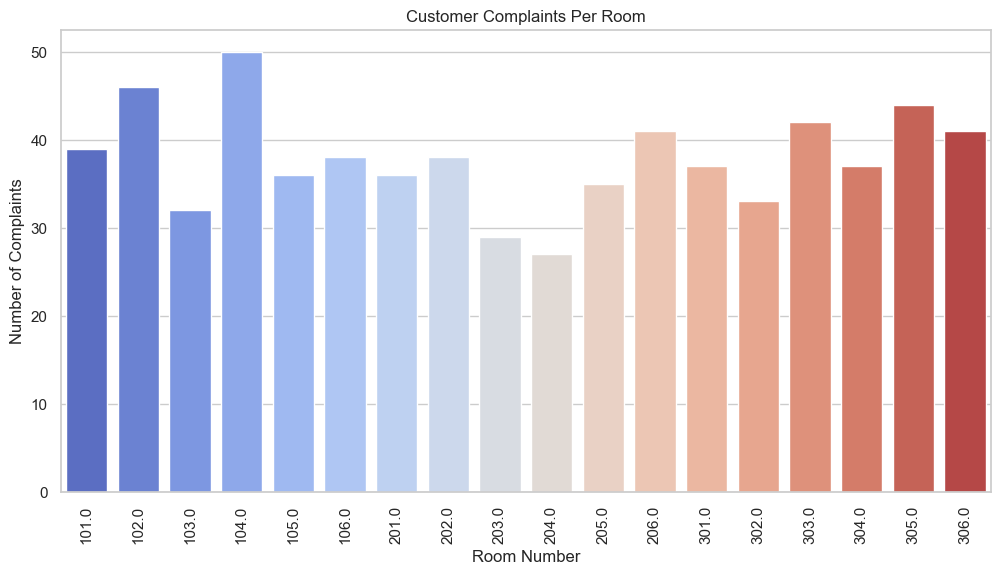

In [23]:
# Visualization
sns.set(style="whitegrid")

# 3. Customer Complaints Per Room
plt.figure(figsize=(12, 6))
sns.barplot(x='Room Number', y='ComplaintCount', data=results["Customer Complaints"], palette='coolwarm')
plt.title("Customer Complaints Per Room")
plt.xlabel("Room Number")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=90)
plt.show()

C:\Users\DCL\AppData\Local\Temp\ipykernel_9576\501828060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ticket Category', y='ComplaintCount', data=results["Key Complaints"], palette='magma')


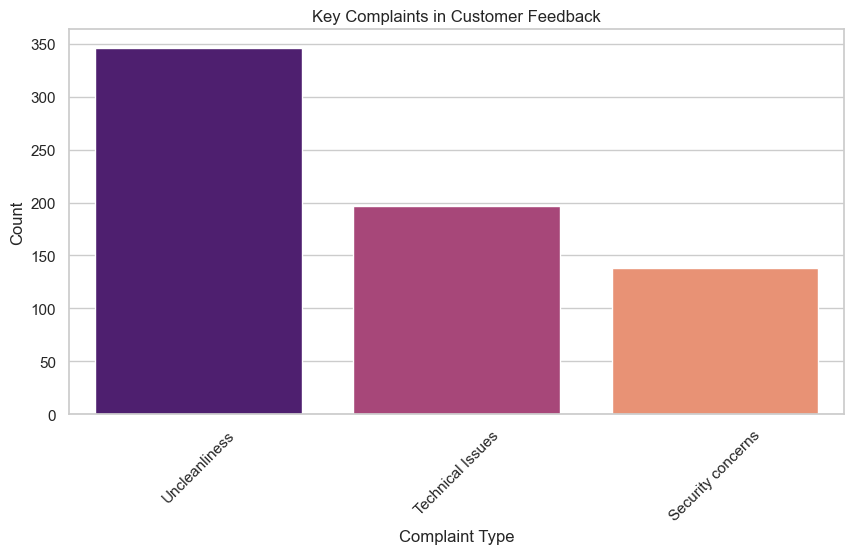

In [24]:
# 4. Key Complaints
plt.figure(figsize=(10, 5))
sns.barplot(x='Ticket Category', y='ComplaintCount', data=results["Key Complaints"], palette='magma')
plt.title("Key Complaints in Customer Feedback")
plt.xlabel("Complaint Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [25]:
# 5. Customer Retention Rate
print("Customer Retention Rate:", results["Customer Retention Rate"]["RetentionRate"].values[0], "%")

Customer Retention Rate: 13.409961685823 %


C:\Users\DCL\AppData\Local\Temp\ipykernel_9576\253058285.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Room Number', y='ComplaintCount', data=results["Customer Complaints"], palette='coolwarm')


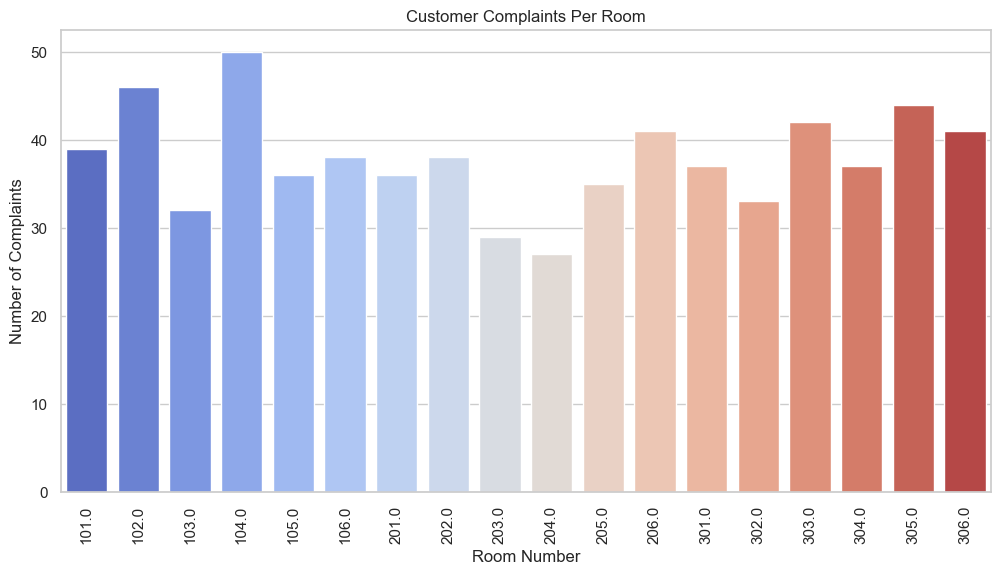

In [26]:

# Plot customer complaints per room
plt.figure(figsize=(12, 6))
sns.barplot(x='Room Number', y='ComplaintCount', data=results["Customer Complaints"], palette='coolwarm')
plt.title("Customer Complaints Per Room")
plt.xlabel("Room Number")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=90)
plt.show()


In [27]:
print(results.keys())

dict_keys(['Unique Customers', 'Occupancy Rate', 'Customer Complaints', 'Key Complaints', 'Customer Retention Rate', 'Revenue Per Room', 'EngagementCount'])


C:\Users\DCL\AppData\Local\Temp\ipykernel_9576\1769337150.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Residence', y='EngagementCount', data=results["EngagementCount"], palette='coolwarm')


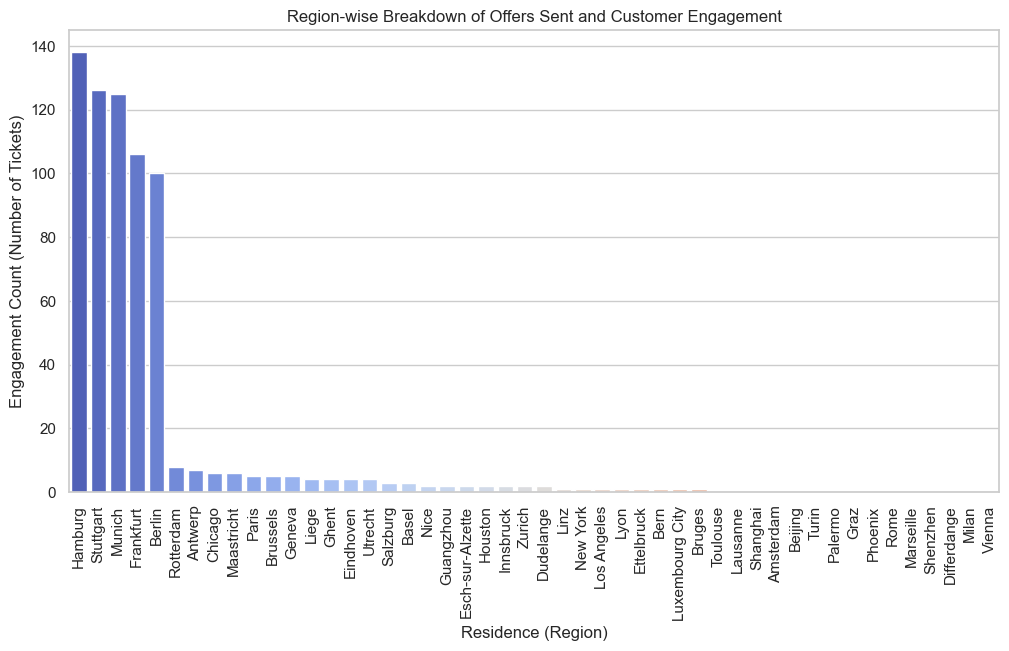

In [31]:
# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Residence', y='EngagementCount', data=results["EngagementCount"], palette='coolwarm')

# Add titles and labels
plt.title("Region-wise Breakdown of Offers Sent and Customer Engagement")
plt.xlabel("Residence (Region)")
plt.ylabel("Engagement Count (Number of Tickets)")
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary

# Show the plot
plt.show()

C:\Users\DCL\AppData\Local\Temp\ipykernel_9576\4097933555.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Room Number', y='TotalRevenue', data=results["Revenue Per Room"], palette='viridis')


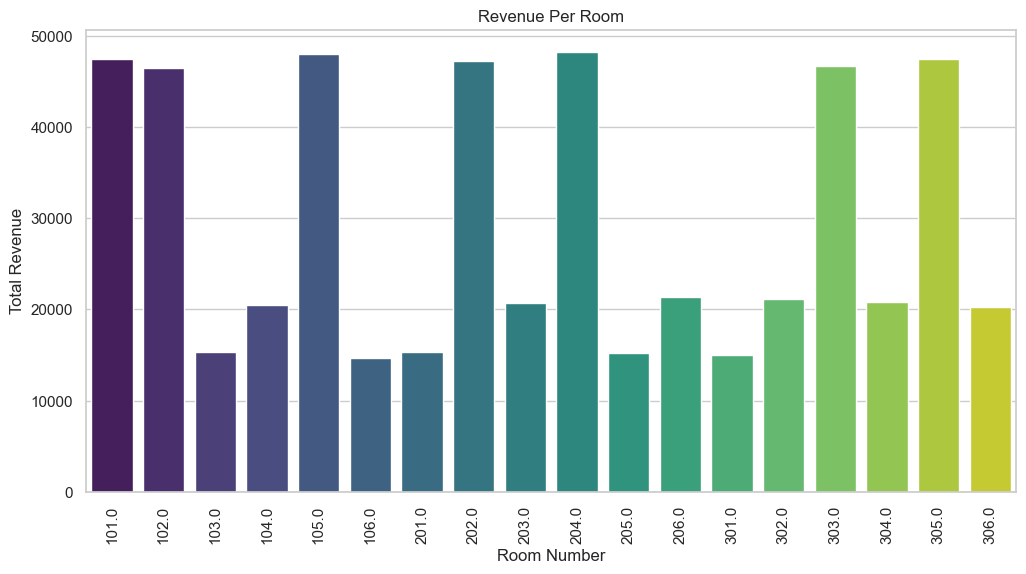

In [29]:
# Plot revenue per room
plt.figure(figsize=(12, 6))
sns.barplot(x='Room Number', y='TotalRevenue', data=results["Revenue Per Room"], palette='viridis')
plt.title("Revenue Per Room")
plt.xlabel("Room Number")
plt.ylabel("Total Revenue")
plt.xticks(rotation=90)
plt.show()

In [30]:
# Display key complaints
print("Key Complaints:")
print(results["Key Complaints"].head())

Key Complaints:
     Ticket Category  ComplaintCount
0      Uncleanliness             346
1   Technical Issues             197
2  Security concerns             138
